In [2]:
import os
import pandas as pd
import librosa
import soundfile
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from google.colab import drive
!pip install pydub
from pydub import AudioSegment
from pydub.utils import mediainfo
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.signal import lfilter
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATA_PATH = '/content/drive/MyDrive/dataV2.csv'
VOICE_PATH = "/content/drive/MyDrive/Voice"

Emotions = {
    1 : 'Angry',
    2 : 'Happy',
    3 : 'Sad',
    4 : 'Neutral'}

Emotions_2 = {
    'Angry' : 1,
    'Happy' : 2,
    'Sad' : 3,
    'Neutral' : 4
}

Gender = {
    'm' : 'male',
    'M' : 'male',
    'f' : 'female',
    'F' : 'female',
    'w' : 'female',
    'f ' : 'female'
}

Gender_2 = {
    'male' : 0,
    'female' : 1
}

In [6]:
def Read_CSV(data_path):
    File = pd.read_csv(data_path)
    return File

In [80]:
def Extract_First_Feature(voice_name):
    voice, sample_rate = librosa.load(voice_name)
    n = 15
    b = [1.0 / n] * n
    a = 1
    voice_reduced = lfilter(b,a,voice)
    scaler = preprocessing.MinMaxScaler()
    normalize_voice = scaler.fit_transform(voice_reduced.reshape(-1, 1))
    mfcc = np.mean(librosa.feature.mfcc(y = normalize_voice.reshape(len(normalize_voice,)), sr = sample_rate, n_mfcc = 50).T, axis = 0)
    return mfcc

In [124]:
def Extract_First1_Feature(voice_name):
  voice, sample_rate = librosa.load(voice_name)
  n = 15
  b = [1.0 / n] * n
  a = 1
  voice_reduced = lfilter(b,a,voice)
  scaler = preprocessing.MinMaxScaler()
  normalize_voice = scaler.fit_transform(voice_reduced.reshape(-1, 1))
  cf = np.mean(librosa.feature.chroma_stft(y = normalize_voice.reshape(len(normalize_voice,)), sr = sample_rate).T, axis = 0)
  return cf

In [9]:
def Extract_Data_First_Feature(data_path, voice_path):
    emotions = []
    features = []
    loaded_data = []
    Counter = 0
    datas = Read_CSV(data_path)
    datas['voice id'] = datas['voice id'].astype('str') + '.wav'
    os.chdir(voice_path)
    for file in os.listdir():           
      if file in datas['voice id'].values and file not in loaded_data:
          loaded_data.append(file)
          try:
            feature = Extract_Third_Feature(file)
            features.append(feature)
            index = datas[datas['voice id'] == os.path.basename(file)].index[0]
            emotion = Emotions[datas['emotionID'][index]]
            emotions.append(emotion)
          except Exception as e:
            print(e)
    return features, emotions

In [ ]:
def Extract_Data_Second_Feature(data_path, voice_path):
    emotions = []
    features = []
    loaded_data = []
    Counter = 0
    datas = Read_CSV(data_path)
    datas['voice id'] = datas['voice id'].astype('str') + '.wav'
    os.chdir(voice_path)
    for file in os.listdir():           
      if file in datas['voice id'].values and file not in loaded_data:
          loaded_data.append(file)
          try:
            feature = Extract_Third_Feature(file)
            features.append(feature)
            index = datas[datas['voice id'] == os.path.basename(file)].index[0]
            emotion = Emotions[datas['emotionID'][index]]
            emotions.append(emotion)
          except Exception as e:
            print(e)
    return features, emotions

In [ ]:
features, emotions = Extract_Data_First_Feature(DATA_PATH, VOICE_PATH)
fetures, emotions = Extract_Data_Second_Feature(DATA_PATH, VOICE_PATH)

In [99]:
def Gender_Finder(data_path, voice_path):
    genders = []
    features = []
    loaded_data = []
    datas = Read_CSV(data_path)
    datas['voice id'] = datas['voice id'].astype('str') + '.wav'
    os.chdir(voice_path)
    for file in os.listdir():            
      if file in datas['voice id'].values and file not in loaded_data:
          loaded_data.append(file)
          try:
            index = datas[datas['voice id'] == os.path.basename(file)].index[0]
            gender = Gender[datas['sex'][index]]
            genders.append(gender)
          except Exception as e:
            print(e)
    return genders

In [6]:
def TextID_Finder(data_path, voice_path):
    ids = []
    features = []
    loaded_data = []
    datas = Read_CSV(data_path)
    datas['voice id'] = datas['voice id'].astype('str') + '.wav'
    os.chdir(voice_path)
    for file in os.listdir():              
      if file in datas['voice id'].values and file not in loaded_data:
          loaded_data.append(file)
          try:
            index = datas[datas['voice id'] == os.path.basename(file)].index[0]
            id = datas['textID'][index]
            ids.append(id)
          except Exception as e:
            print(e)
    return ids

In [10]:
ids = TextID_Finder(DATA_PATH, VOICE_PATH)

In [113]:
Genders = Gender_Finder(DATA_PATH, VOICE_PATH)

In [7]:
def Shuffle(data, labels):
    temp = list(zip(data, labels))
    np.random.shuffle(temp)
    data, labels = zip(*temp)
    return np.array(data), np.array(labels)

In [ ]:
def ROC(model, x_train, y_train, x_test, y_test):
  visualizer = ROCAUC(model)
  visualizer.fit(x_train, y_train)
  visualizer.score(x_test, y_test) 
  visualizer.show() 

In [9]:
features, emotions = Shuffle(features, emotions)

In [ ]:
features_total = []
for i in range(len(features)):
  features_total.append([])
  for j in features[i]:
    features_total[i].append(j)
  for j in features2[i]:
    features_total[i].append(j)

In [ ]:
import math
x_train = features[:math.floor(len(features) * 0.7)]
x_test = features[math.floor(len(features) * 0.7):]
y_train = emotions[:math.floor(len(emotions) * 0.7)]
y_test = emotions[math.floor(len(emotions) * 0.7):]

In [11]:
from sklearn.svm import SVC
kernel = ['linear', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
for k in kernel:
  for g in gamma:
    clf = make_pipeline(StandardScaler(), SVC(kernel=k, gamma=g))
    print(clf.fit(x_train, y_train).score(x_test,y_test))

0.4019062748212867
0.4019062748212867
0.48451151707704526
0.48451151707704526
0.31731532962668785
0.31731532962668785


In [13]:
for i in range(1,15):
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  print(clf.fit(x_train, y_train).score(x_test, y_test))

0.494440031771247
0.494241461477363
0.5077442414614773
0.5150913423351866
0.5160841938046068
0.5146942017474185
0.5127084988085783
0.5091342335186656
0.5041699761715648
0.5051628276409849
0.5045671167593329
0.5015885623510723
0.4954328832406672
0.4918586179507546


In [ ]:
solver = ['saga', 'sag', 'liblinear', 'lbfgs', 'newton-cg']
max_iter = [250, 500, 100]
penalty = ['l2']
for p in penalty:
  for s in solver:
    for i in max_iter:
      clf = LogisticRegression(penalty=p, solver=s, max_iter=i)
      print('penalty:', p, 'solver:', s, 'iteration:', i, 'accuracy:', clf.fit(x_train, y_train).score(x_test, y_test))

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
hidden_layer_sizes = [100, 200, 300, 400, 500]
activation = ['relu', 'logistic', 'tanh']
solver = ['lbfgs', 'sgd', 'adam']
max_iter = [250, 500, 100]
for h in hidden_layer_sizes:
  for f in activation:
    for s in solver:
      for i in max_iter:
        clf = MLPClassifier(hidden_layer_sizes=(h,), activation=f, solver=s, max_iter=i)
        print('hidden layer:', h, 'activation:', f, 'solver:', s, 'iteration:', i, 'score:', clf.fit(x_train, y_train).score(x_test, y_test))
        

In [39]:
#emotions without PCA for 384 features

# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=5)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(500,), activation='logistic', solver='adam', max_iter=250)
mlp_best.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(500,), max_iter=250)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


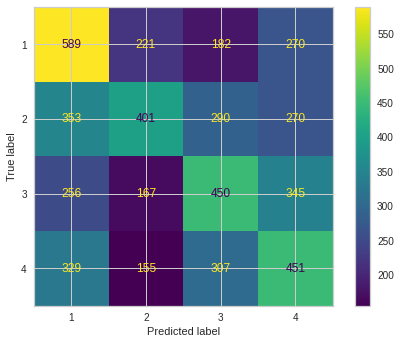

In [44]:
plot_confusion_matrix(svm_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


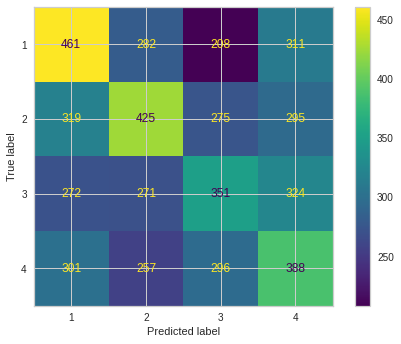

In [45]:
plot_confusion_matrix(knn_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


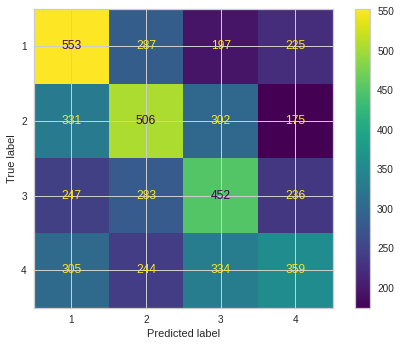

In [42]:
plot_confusion_matrix(lgr_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


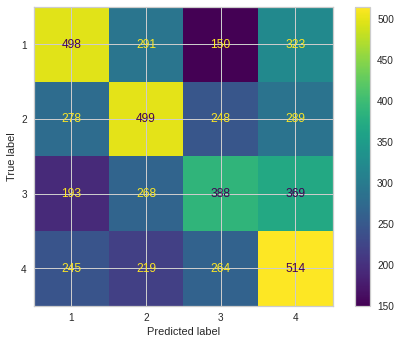

In [46]:
plot_confusion_matrix(mlp_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

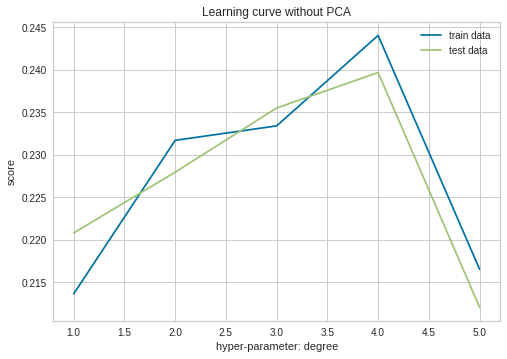

In [17]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

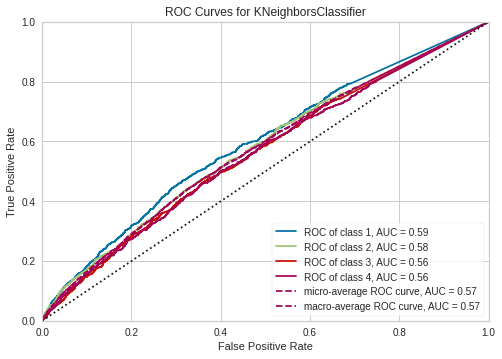

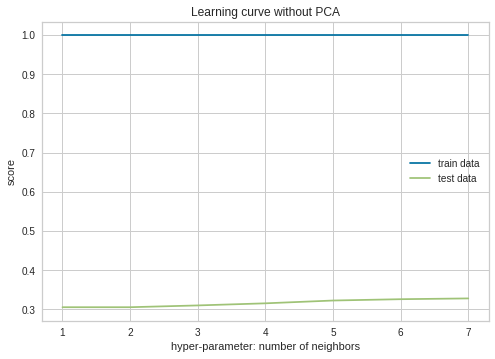

In [18]:
ROC(knn_best, x_train, y_train, x_test, y_test)
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

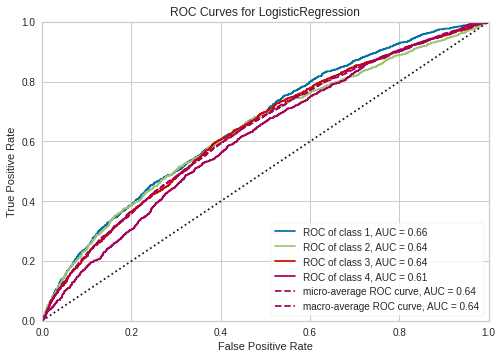

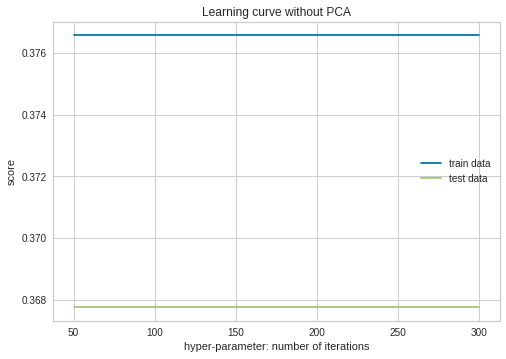

In [19]:
ROC(lgr_best, x_train, y_train, x_test, y_test)
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

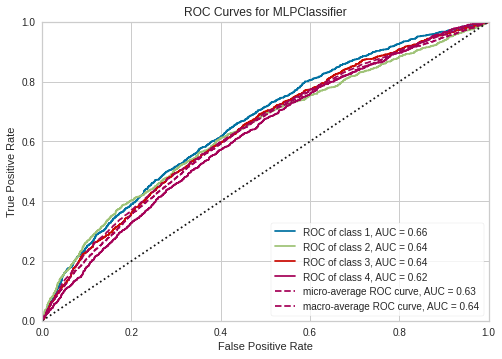

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


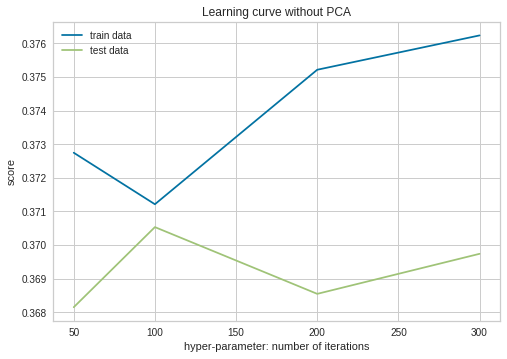

In [20]:
ROC(mlp_best, x_train, y_train, x_test, y_test)
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(features)
reduced_features = pca.transform(features)

In [22]:
import math
x_train = reduced_features[:math.floor(len(reduced_features) * 0.7)]
x_test = reduced_features[math.floor(len(reduced_features) * 0.7):]
y_train = emotions[:math.floor(len(emotions) * 0.7)]
y_test = emotions[math.floor(len(emotions) * 0.7):]

In [23]:
#emotions with PCA for 384 features

# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=4)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='saga', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=250)
mlp_best.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(400,), max_iter=250)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

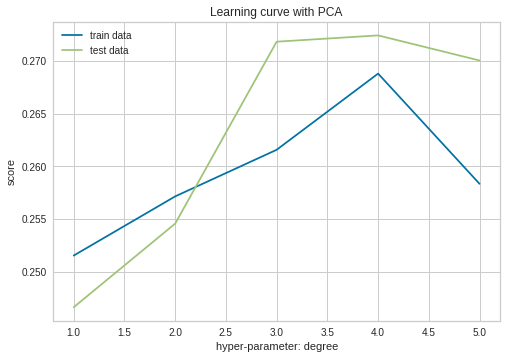

In [24]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

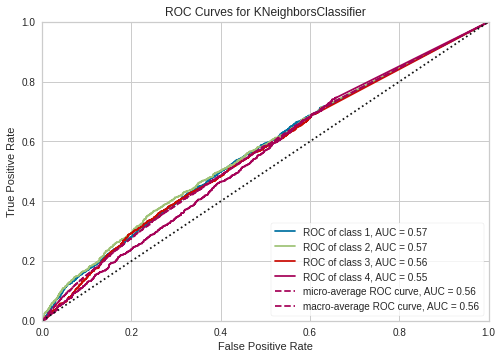

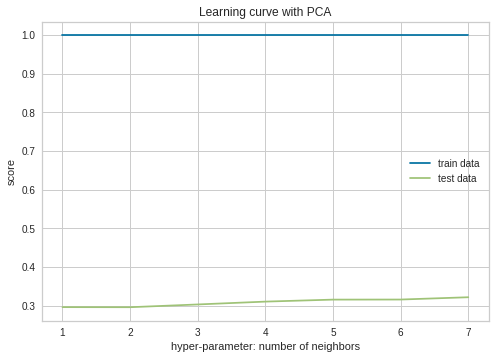

In [25]:
ROC(knn_best, x_train, y_train, x_test, y_test)
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

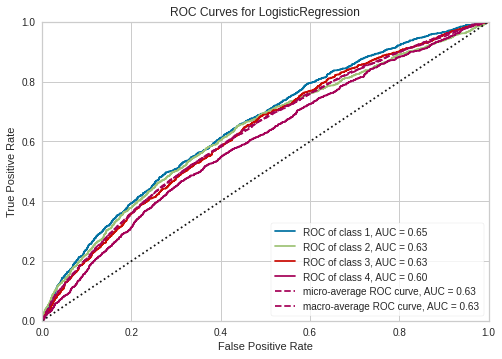

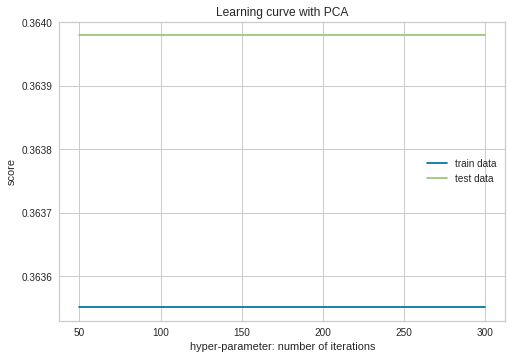

In [26]:
ROC(lgr_best, x_train, y_train, x_test, y_test)
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

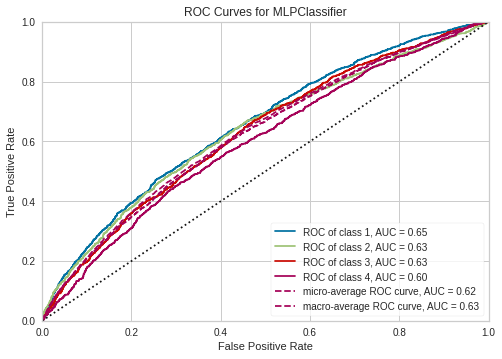

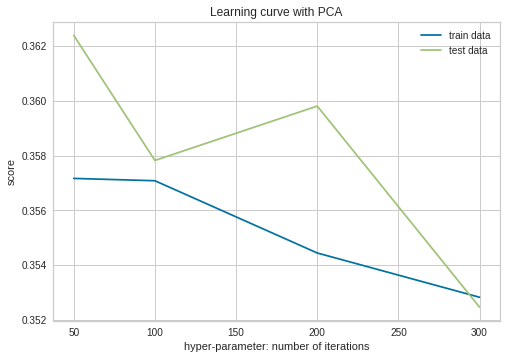

In [27]:
ROC(mlp_best, x_train, y_train, x_test, y_test)
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


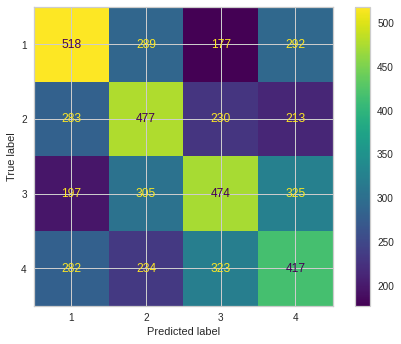

In [31]:
plot_confusion_matrix(svm_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


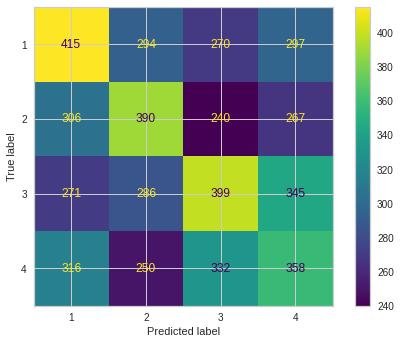

In [32]:
plot_confusion_matrix(knn_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


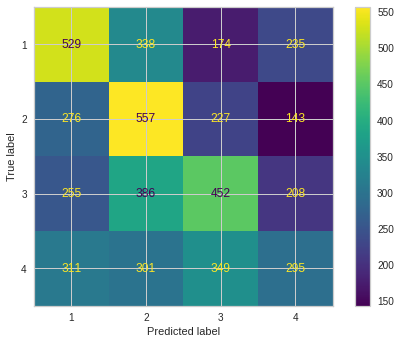

In [33]:
plot_confusion_matrix(lgr_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


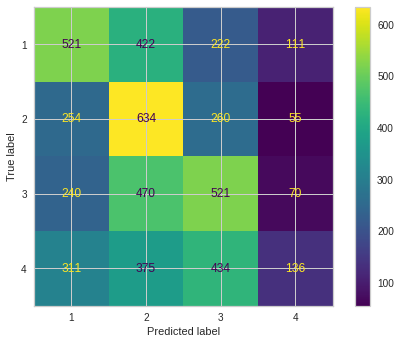

In [34]:
plot_confusion_matrix(mlp_best, x_test, y_test) 

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
#genders without PCA for 384 features

# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=3)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(300 ,), activation='logistic', solver='lbfgs', max_iter=250)
mlp_best.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(300,), max_iter=250,
              solver='lbfgs')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


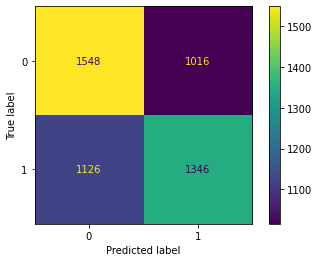

In [65]:
plot_confusion_matrix(svm_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


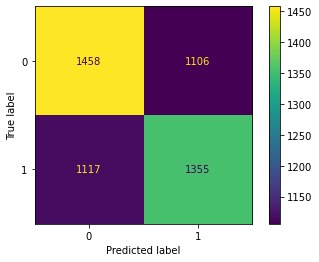

In [66]:
plot_confusion_matrix(knn_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


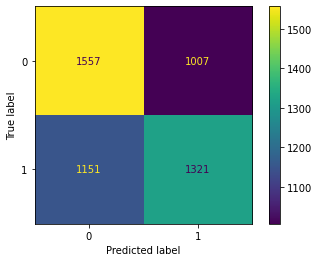

In [63]:
plot_confusion_matrix(lgr_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


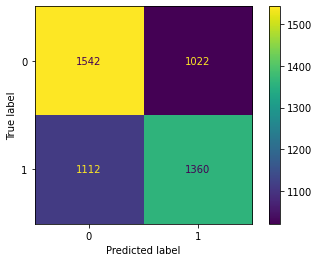

In [64]:
plot_confusion_matrix(mlp_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

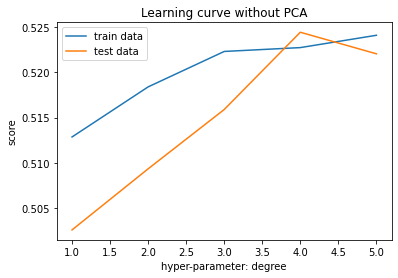

In [31]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

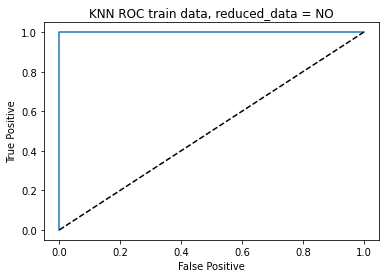

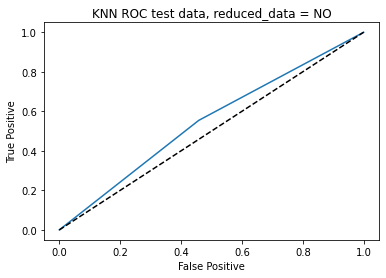

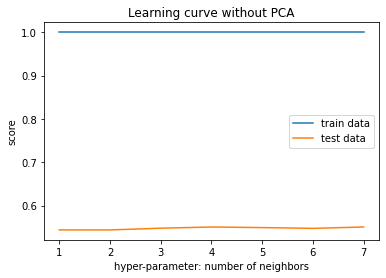

In [32]:
ROC(knn_best, x_train, y_train, 'KNN', 'train', 'NO')
ROC(knn_best, x_test, y_test, 'KNN', 'test', 'NO')
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

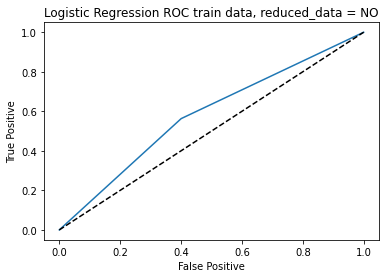

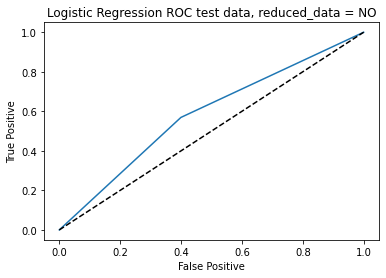

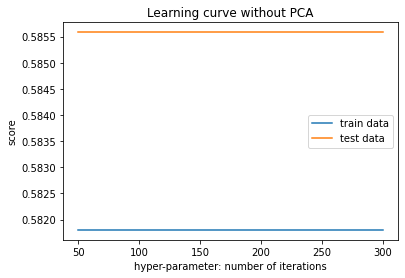

In [33]:
ROC(lgr_best, x_train, y_train, 'Logistic Regression', 'train', 'NO')
ROC(lgr_best, x_test, y_test, 'Logistic Regression', 'test', 'NO')
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

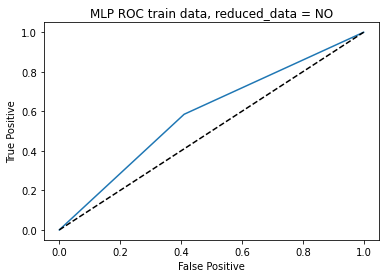

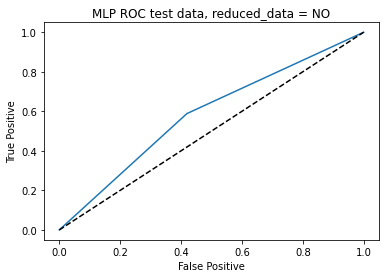

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


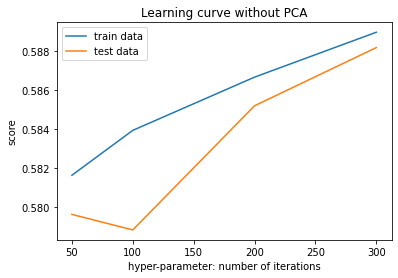

In [34]:
ROC(mlp_best, x_train, y_train, 'MLP', 'train', 'NO')
ROC(mlp_best, x_test, y_test, 'MLP', 'test', 'NO')
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(features)
reduced_features = pca.transform(features)

In [36]:
import math
x_train = reduced_features[:math.floor(len(reduced_features) * 0.7)]
x_test = reduced_features[math.floor(len(reduced_features) * 0.7):]
y_train = Genders[:math.floor(len(Genders) * 0.7)]
y_test = Genders[math.floor(len(Genders) * 0.7):]

In [37]:
#genders with PCA for 384 features

# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=3)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(300 ,), activation='logistic', solver='lbfgs', max_iter=250)
mlp_best.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(300,), max_iter=250,
              solver='lbfgs')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

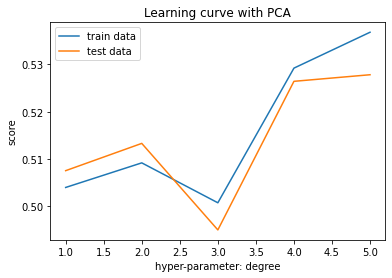

In [38]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

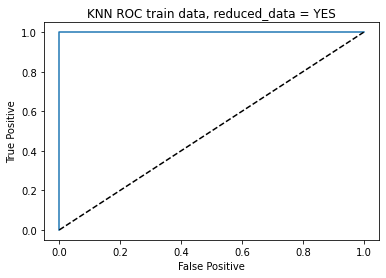

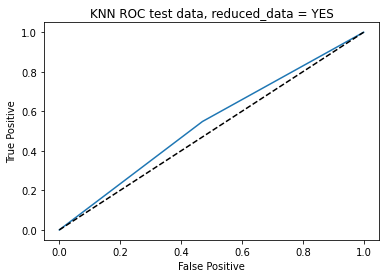

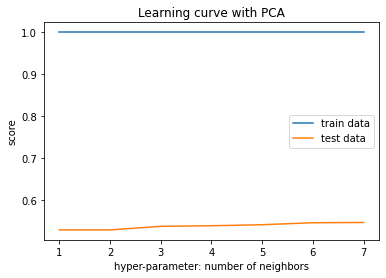

In [39]:
ROC(knn_best, x_train, y_train, 'KNN', 'train', 'YES')
ROC(knn_best, x_test, y_test, 'KNN', 'test', 'YES')
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

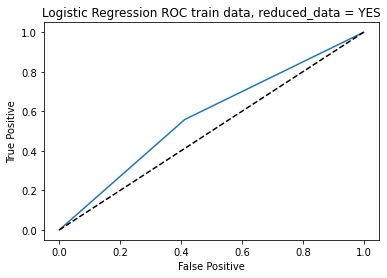

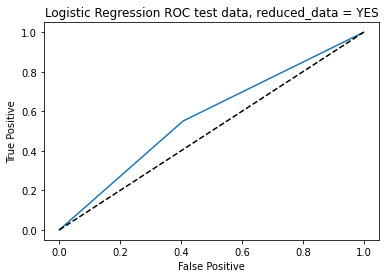

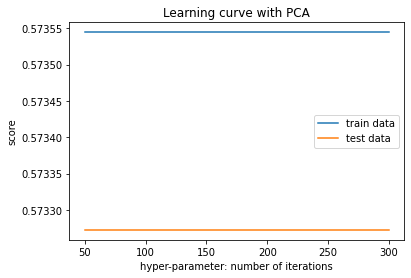

In [40]:
ROC(lgr_best, x_train, y_train, 'Logistic Regression', 'train', 'YES')
ROC(lgr_best, x_test, y_test, 'Logistic Regression', 'test', 'YES')
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

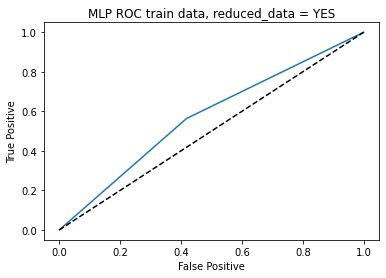

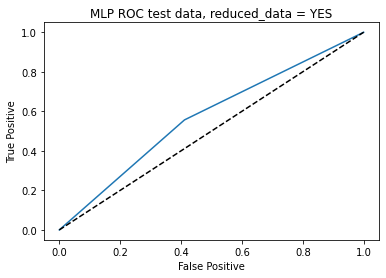

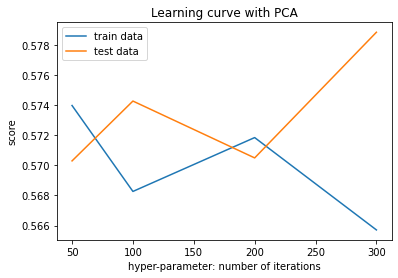

In [41]:
ROC(mlp_best, x_train, y_train, 'MLP', 'train', 'YES')
ROC(mlp_best, x_test, y_test, 'MLP', 'test', 'YES')
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


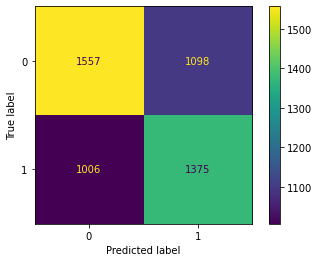

In [46]:
plot_confusion_matrix(svm_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


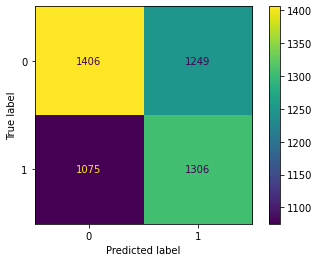

In [47]:
plot_confusion_matrix(knn_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


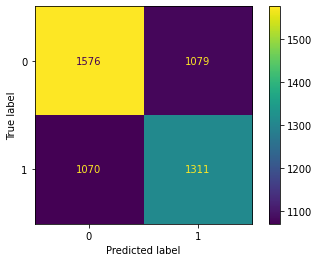

In [48]:
plot_confusion_matrix(lgr_best, x_test, y_test) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


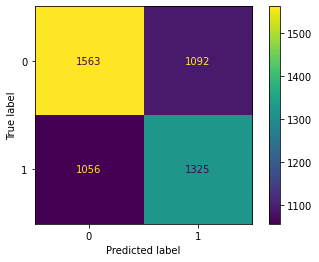

In [49]:
plot_confusion_matrix(mlp_best, x_test, y_test)

In [11]:
#Emotions without PCA for 62 features

# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=5)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(500,), activation='logistic', solver='adam', max_iter=250)
mlp_best.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(500,), max_iter=250)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

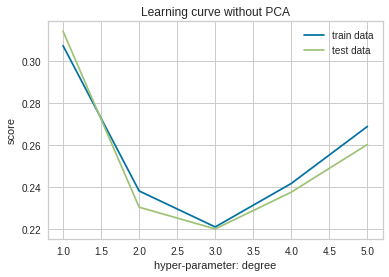

In [13]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

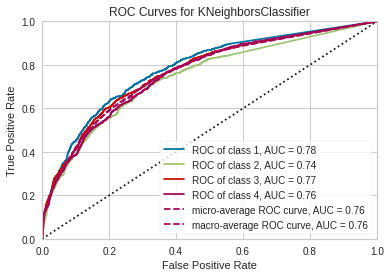

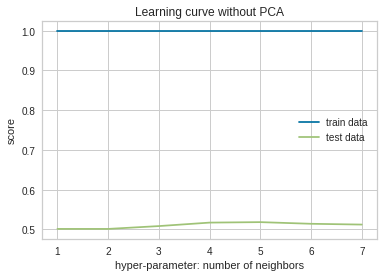

In [14]:
ROC(knn_best, x_train, y_train, x_test, y_test)
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

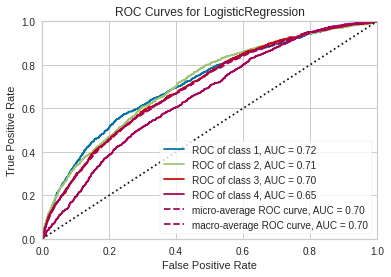

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


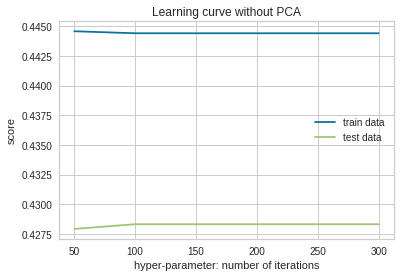

In [15]:
ROC(lgr_best, x_train, y_train, x_test, y_test)
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

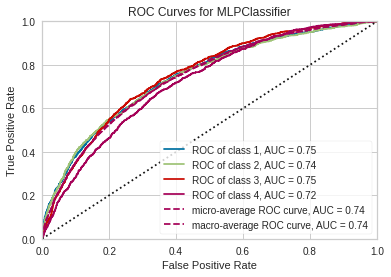

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


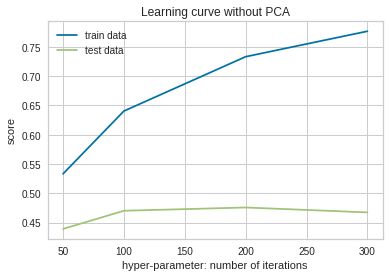

In [16]:
ROC(mlp_best, x_train, y_train, x_test, y_test)
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(features)
reduced_features = pca.transform(features)

In [18]:
import math
x_train = reduced_features[:math.floor(len(reduced_features) * 0.7)]
x_test = reduced_features[math.floor(len(reduced_features) * 0.7):]
y_train = emotions[:math.floor(len(emotions) * 0.7)]
y_test = emotions[math.floor(len(emotions) * 0.7):]

In [19]:
#Emotions witho PCA for 62 features

# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=4)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='saga', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=250)
mlp_best.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(400,), max_iter=250)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

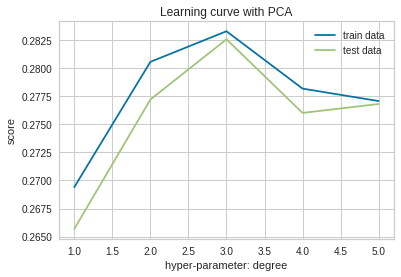

In [20]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

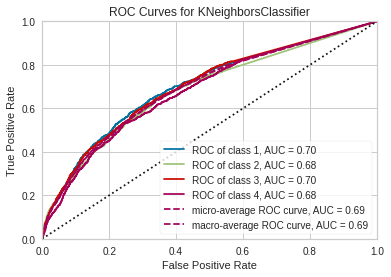

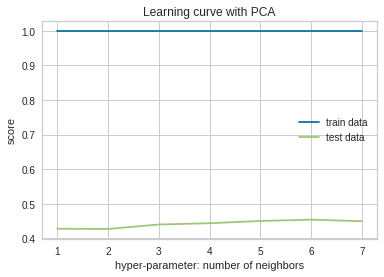

In [21]:
ROC(knn_best, x_train, y_train, x_test, y_test)
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

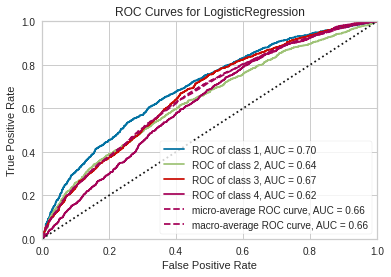

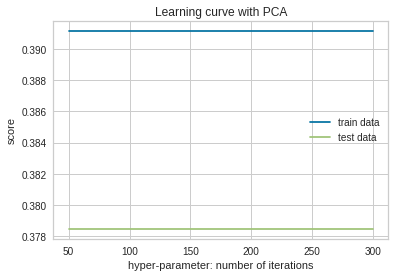

In [22]:
ROC(lgr_best, x_train, y_train, x_test, y_test)
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

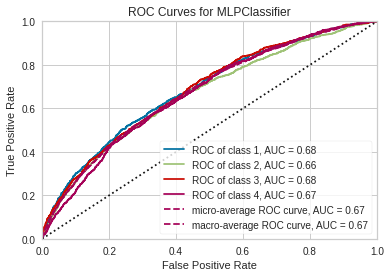

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


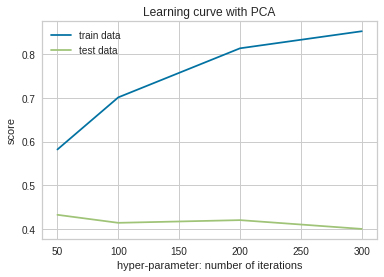

In [23]:
ROC(mlp_best, x_train, y_train, x_test, y_test)
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


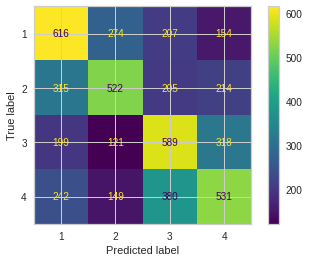

In [25]:
plot_confusion_matrix(svm_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


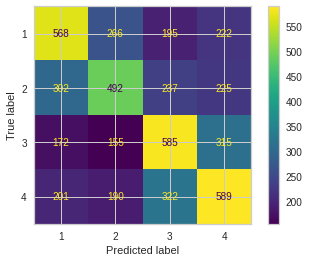

In [26]:
plot_confusion_matrix(knn_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


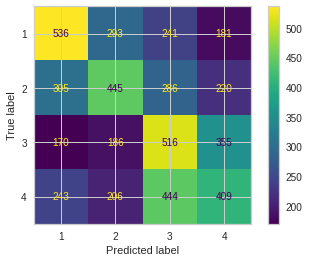

In [27]:
plot_confusion_matrix(lgr_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


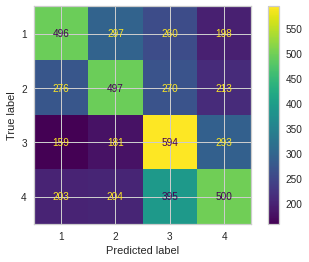

In [28]:
plot_confusion_matrix(mlp_best, x_test, y_test) 

In [89]:
#Gender without PCA for 62 features
# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=4)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='saga', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=250)
mlp_best.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(400,), max_iter=250)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

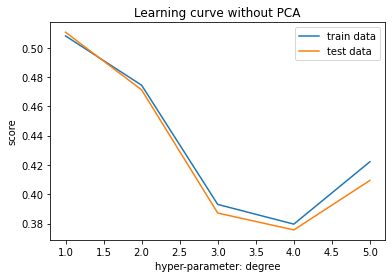

In [90]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

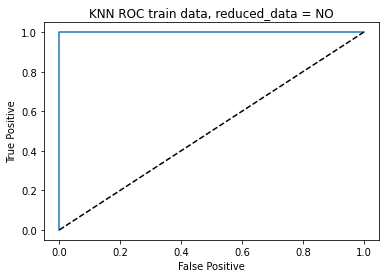

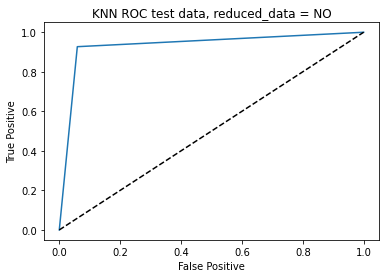

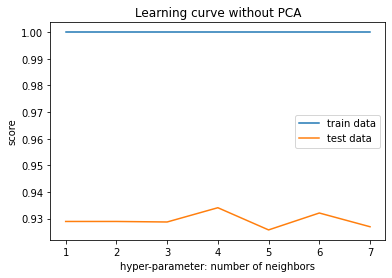

In [91]:
ROC(knn_best, x_train, y_train, 'KNN', 'train', 'NO')
ROC(knn_best, x_test, y_test, 'KNN', 'test', 'NO')
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

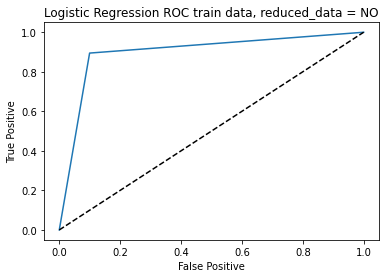

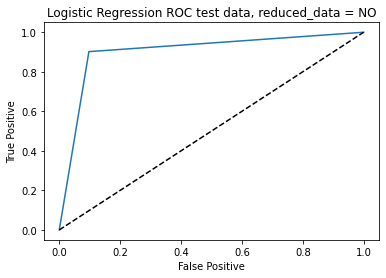

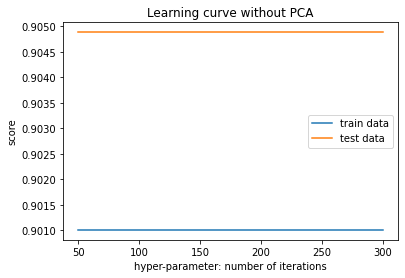

In [92]:
ROC(lgr_best, x_train, y_train, 'Logistic Regression', 'train', 'NO')
ROC(lgr_best, x_test, y_test, 'Logistic Regression', 'test', 'NO')
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

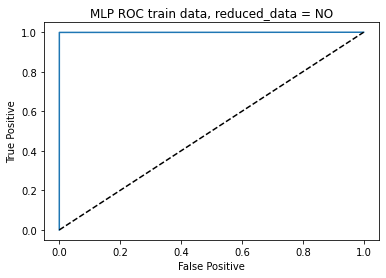

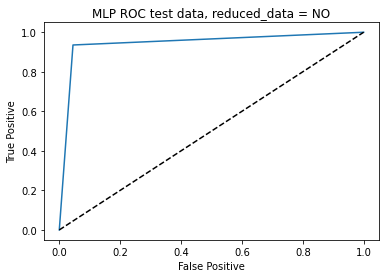

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


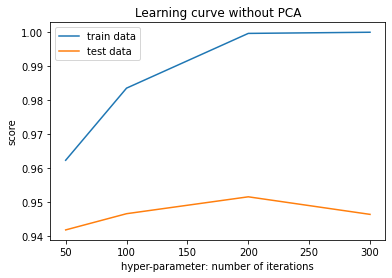

In [93]:
ROC(mlp_best, x_train, y_train, 'MLP', 'train', 'NO')
ROC(mlp_best, x_test, y_test, 'MLP', 'test', 'NO')
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve without PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(features)
reduced_features = pca.transform(features)

In [95]:
import math
x_train = reduced_features[:math.floor(len(reduced_features) * 0.7)]
x_test = reduced_features[math.floor(len(reduced_features) * 0.7):]
y_train = Genders[:math.floor(len(Genders) * 0.7)]
y_test = Genders[math.floor(len(Genders) * 0.7):]

In [96]:
#Gender without PCA for 62 features
# best svm
svm_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_best.fit(x_train, y_train)
#best knn
knn_best = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=4)
knn_best.fit(x_train, y_train)
#best logistic regression 
lgr_best = LogisticRegression(penalty='l2', solver='saga', max_iter=500)
lgr_best.fit(x_train, y_train)
# best mlp
mlp_best = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=250)
mlp_best.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(400,), max_iter=250)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

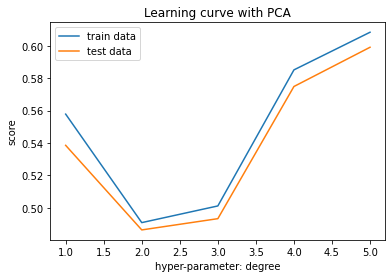

In [97]:
# learning curve, svm
hyper_parameter = [1, 2, 3, 4, 5] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', max_iter = i))
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: degree')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

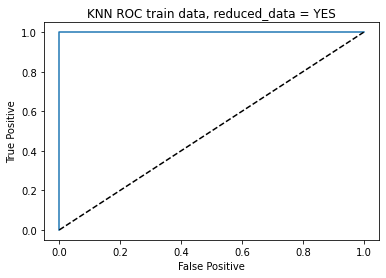

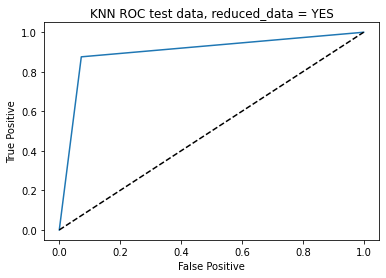

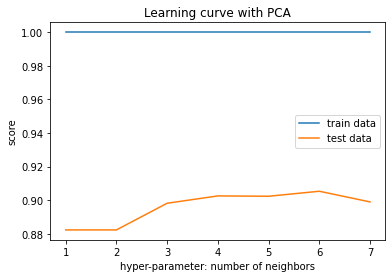

In [98]:
ROC(knn_best, x_train, y_train, 'KNN', 'train', 'YES')
ROC(knn_best, x_test, y_test, 'KNN', 'test', 'YES')
# learning curve, knn
hyper_parameter = [1, 2, 3, 4, 5, 6, 7] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = KNeighborsClassifier(weights='distance',metric='manhattan',algorithm='ball_tree',n_neighbors=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of neighbors')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

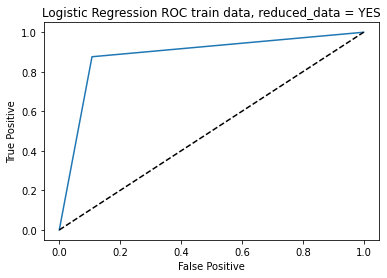

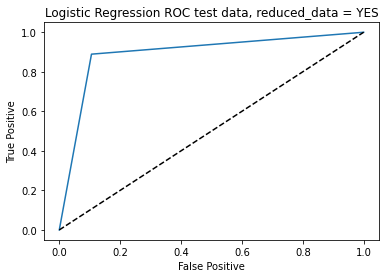

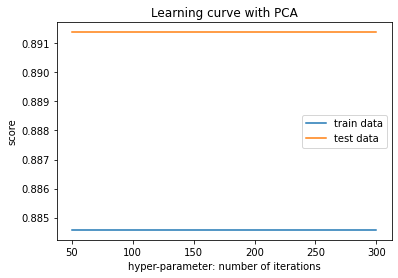

In [99]:
ROC(lgr_best, x_train, y_train, 'Logistic Regression', 'train', 'YES')
ROC(lgr_best, x_test, y_test, 'Logistic Regression', 'test', 'YES')
# learning curve, lgr
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

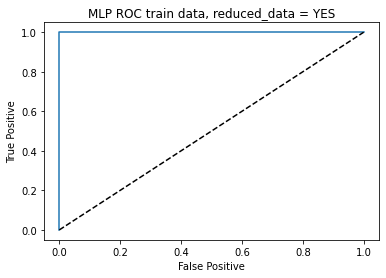

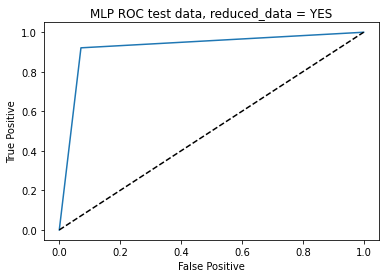

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


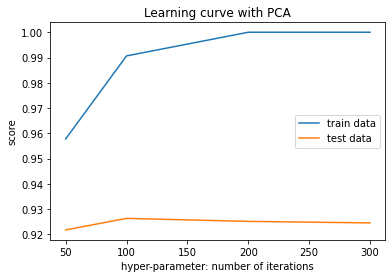

In [100]:
ROC(mlp_best, x_train, y_train, 'MLP', 'train', 'YES')
ROC(mlp_best, x_test, y_test, 'MLP', 'test', 'YES')
# learning curve, mlp
hyper_parameter = [50, 100, 200, 300] 
output_test = []
output_train = []
for i in hyper_parameter:
  clf = MLPClassifier(hidden_layer_sizes=(400 ,), activation='logistic', solver='adam', max_iter=i)
  clf.fit(x_train, y_train)
  output_test.append(clf.score(x_test, y_test))
  output_train.append(clf.score(x_train, y_train))
plt.title('Learning curve with PCA')
plt.xlabel('hyper-parameter: number of iterations')
plt.ylabel('score')
plt.plot(hyper_parameter, output_train)
plt.plot(hyper_parameter, output_test)
plt.legend(['train data', 'test data'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


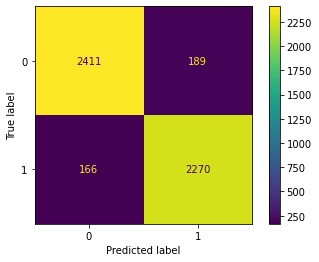

In [102]:
plot_confusion_matrix(svm_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


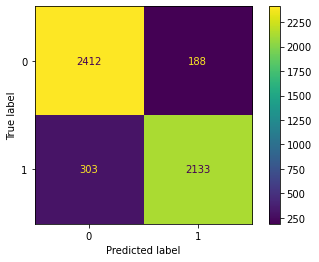

In [103]:
plot_confusion_matrix(knn_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


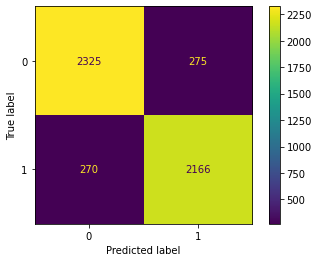

In [104]:
plot_confusion_matrix(lgr_best, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


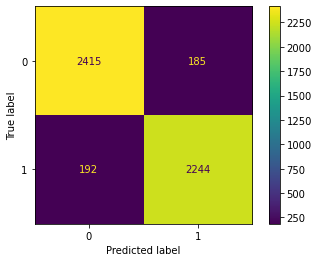

In [105]:
plot_confusion_matrix(mlp_best, x_test, y_test) 